<a href="https://colab.research.google.com/github/3lLobo/basic-probability-programming/blob/master/FinalProject_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
# This cell import modules

from sklearn import datasets ## imports datasets from scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import time
import seaborn as sns

sns.set()

In [95]:
# This cell creates the linear regression class


class LinearRegression():
    __doc__ = """
    This class initiates a linear regression model.
    It uses the loss function is 'ordinary least squares' (OLS).
    To train the model use the fit() method, expample:
    >>> y = data['income']
    >>> x = data['education']
    >>> model = LinearRegression(y,x)
    >>> results = model.fit()
    """
    def __init__(self, X, y, multi=False, lr=0.03, n_iter=1500):
        """
        Initializes the model given the data to fit on.
        :param X: input data
        :param y: target data
        :param multi: if True, model will use multiple input features
        :param lr: learning rate
        :param n_iter: number of iterations during training
        """
        X = X if multi else X.reshape(-1,1)
        y = y
        self.multi = multi
        self.lr = lr
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1) if multi else 1
        self.X = np.hstack((np.ones((self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.y = y
        self.params = np.zeros((self.n_features + 1, 1))
        self.w_ = None
        self.b_ = None

    def fit(self):
        """
        Fits the models to the data given when initialized.
        The model performs backpropagation for the given number of iterations.
        Use this method before predicting or scoringthe model.
        """
        for i in range(self.n_iter):
            self.params = self.params - (self.lr/self.n_samples) * self.X.T @ (self.X @ self.params - self.y.reshape(-1,1))

        self.b_ = self.params[0]
        self.w_ = self.params[1:]

        return self

    def score(self, X=None, y=None):
        """
        Returns the R**2 score for the given data.
        If no data is passed, the initial data is used to compute the score.
        :param X: input data
        :param y: target data
        :return: R**2 score of the model on the data
        """
        if X is None:
            X = self.X
        else:
            X = X if self.multi else X.reshape(-1,1)
            n_samples = len(y)
            X = np.hstack((np.ones((n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))

        if y is None:
            y = self.y
        else:
            y = y

        y_pred = X @ self.params
        denom = ((y - y_pred)**2).sum()
        divo = ((y - y.mean())**2).sum()
        r2score = 1- denom / divo

        return r2score

    def predict(self, X):
        """
        The model makes a prediction on the input data.
        :params X: input data
        :return: prediction
        """
        X = X if self.multi else X.reshape(-1,1)
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) / np.std(X, 0))) @ self.params
        return y

    def get_params(self):
        """
        Returns the current weight and bias parameter.
        :returns: weights and bias
        """
        return self.params


In [96]:
# This cell loads the dataset

data = datasets.load_boston() ## loads Boston dataset from datasets library.
df = pd.DataFrame(data.data, columns=data.feature_names)
test = False                    ## Switch this to True if you want to split the data into train and test set (which was not stated in the project description).
test_split = 0.2              ## Percantage of the full set to be used as test set.
seed = 11
print('Total number of datapoints: {}'.format(len(df)))

Total number of datapoints: 506


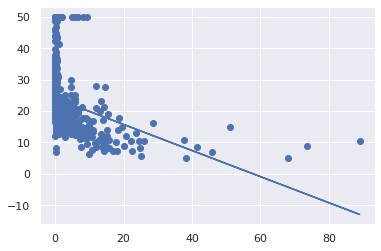

Feature: CRIM 
 R^2: 0.15078046904975717 
 data: complete set


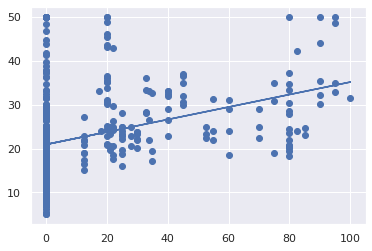

Feature: ZN 
 R^2: 0.12992084489428946 
 data: complete set


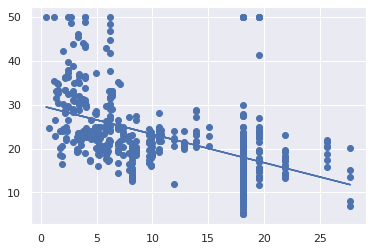

Feature: INDUS 
 R^2: 0.2339900304444752 
 data: complete set


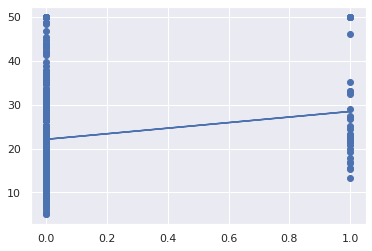

Feature: CHAS 
 R^2: 0.03071612970877502 
 data: complete set


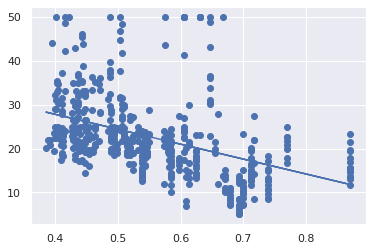

Feature: NOX 
 R^2: 0.182603042501699 
 data: complete set


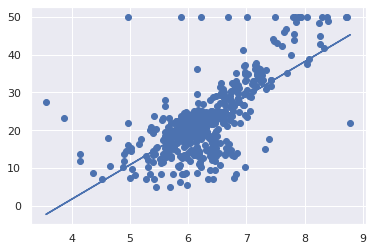

Feature: RM 
 R^2: 0.4835254559913341 
 data: complete set


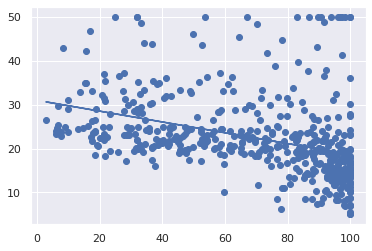

Feature: AGE 
 R^2: 0.14209474407780465 
 data: complete set


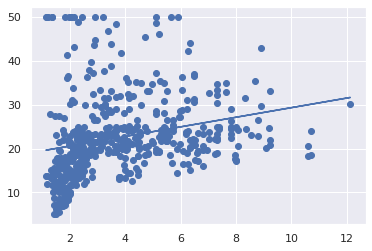

Feature: DIS 
 R^2: 0.062464372121782574 
 data: complete set


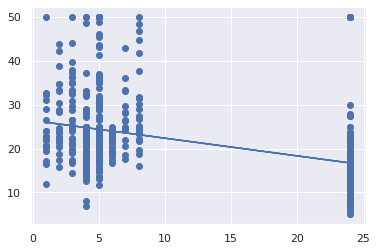

Feature: RAD 
 R^2: 0.14563857991232532 
 data: complete set


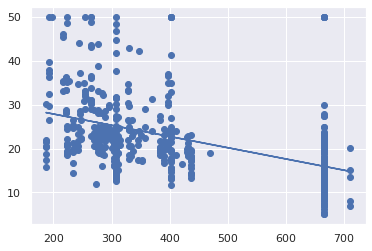

Feature: TAX 
 R^2: 0.2195259210442192 
 data: complete set


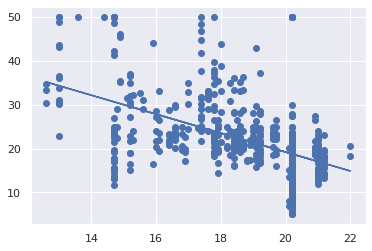

Feature: PTRATIO 
 R^2: 0.257847318009223 
 data: complete set


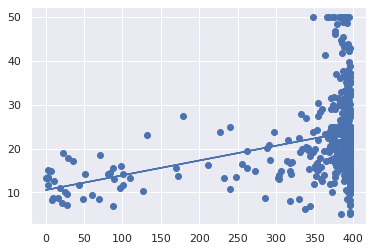

Feature: B 
 R^2: 0.11119611824636277 
 data: complete set


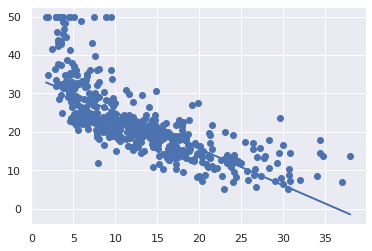

Feature: LSTAT 
 R^2: 0.5441462975864797 
 data: complete set


In [97]:
# Train and plot the model on differnt features

y = pd.DataFrame(data.target, columns=["MEDV"])
if test:
  x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=11)
  y_train, y_test = np.array(y_train), np.array(y_test)
else:
  x_train = df
  y_train = np.array(y)

r2_dict = dict()

for col in x_train.columns:
  if col != '"MEDV':
    input_data = np.array(x_train[col])
    reg = LinearRegression(X=input_data, y=y_train)
    params = reg.fit()
    plt.scatter(input_data, y_train)
    plt.plot(input_data, reg.predict(input_data))
    plt.show()
    plt.close()
    r2 = reg.score()
    r2_dict[col] = dict()
    r2_dict[col]['linear'] = r2 
    print('Feature: {} \n R^2: {} \n data: {} set'.format(col, r2, 'train' if test else 'complete'))
    if test:
      input_test = np.array(x_test[col])
      r2_test = reg.score(input_test, y_test)
      print('Feature: {} \n R^2: {} \n data: {} set'.format(col, r2_test, 'test'))



We can clearly see that the mddel performs good on the features:
- LSTAT
- RM

The features CRIM, ZM, CHAS, NOX, AGE, DIS, B seem to be exponentially distributed. Thus, we would achive better results in logspace. Let's try that. 

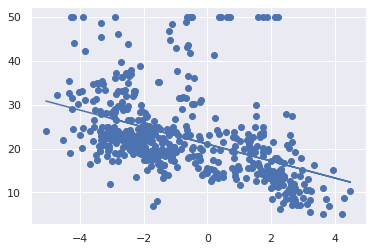

Feature: CRIM 
 R^2: 0.2063902628834362 
 data: complete set


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in subtract


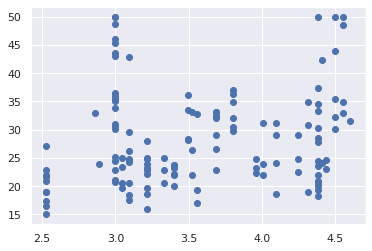

Feature: ZN 
 R^2: nan 
 data: complete set


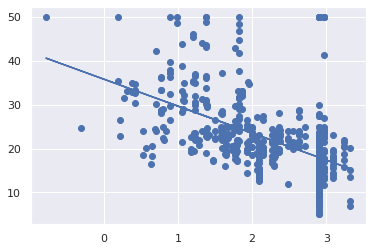

Feature: INDUS 
 R^2: 0.2696415851511623 
 data: complete set


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in subtract


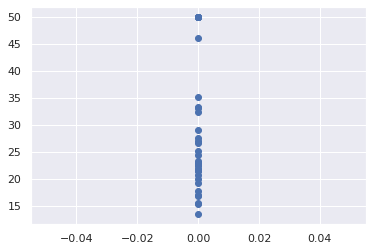

Feature: CHAS 
 R^2: nan 
 data: complete set


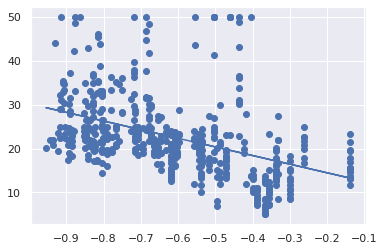

Feature: NOX 
 R^2: 0.1855937720278774 
 data: complete set


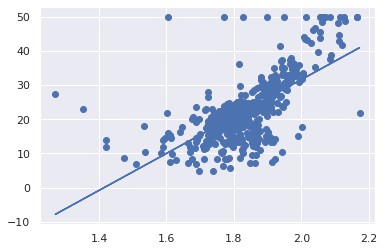

Feature: RM 
 R^2: 0.4358284521006024 
 data: complete set


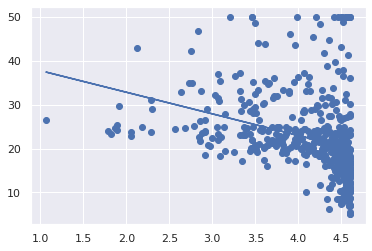

Feature: AGE 
 R^2: 0.1066103526956147 
 data: complete set


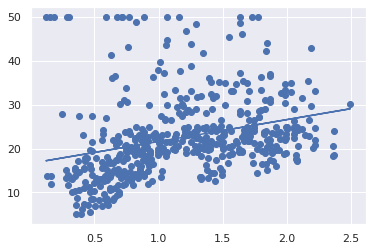

Feature: DIS 
 R^2: 0.08544845128981626 
 data: complete set


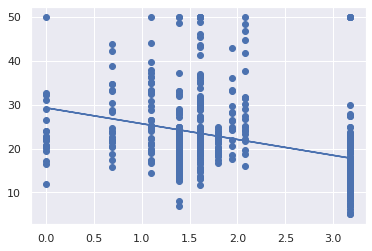

Feature: RAD 
 R^2: 0.11739652512524679 
 data: complete set


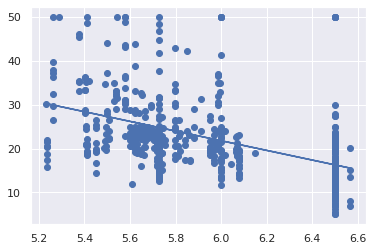

Feature: TAX 
 R^2: 0.22534081130835804 
 data: complete set


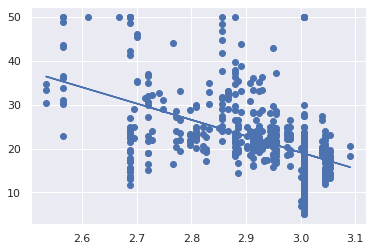

Feature: PTRATIO 
 R^2: 0.2531698109217425 
 data: complete set


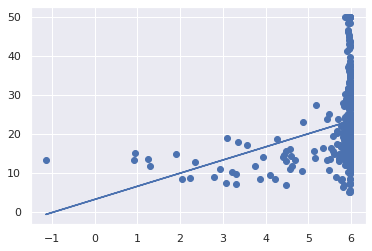

Feature: B 
 R^2: 0.08017793805018292 
 data: complete set


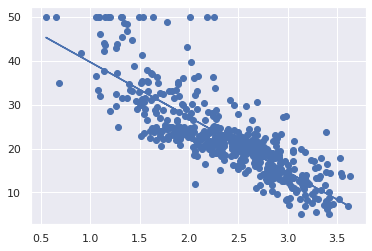

Feature: LSTAT 
 R^2: 0.6649462248792692 
 data: complete set


In [98]:
# Train and plot the model on differnt features in log space

for col in x_train.columns:
  if col != '"MEDV':
    input_data = np.log(np.array(x_train[col]))
    reg = LinearRegression(X=input_data, y=y_train)
    reg.fit()
    plt.scatter(input_data, y_train)
    plt.plot(input_data, reg.predict(input_data))
    plt.show()
    plt.close()
    r2 = reg.score()
    r2_dict[col]['log'] = 0 if r2 is None else r2
    print('Feature: {} \n R^2: {} \n data: {} set'.format(col, r2, 'train' if test else 'complete'))
    if test:
      input_test = np.log(np.array(x_test[col]))
      r2_test = reg.score(input_test, y_test)
      print('Feature: {} \n R^2: {} \n data: {} set'.format(col, r2_test, 'test'))



Now let's compare which features did better in which linear or log space:

In [99]:
# model performance comparison between linear and log space
input_keys = list()
for key in r2_dict:
  if key not in ["MEDV"]:
    input_keys.append(key)
    print(key)
    print('Feature {}: normal {:.2}R2 \t log {:.2}R2'.format(key, r2_dict[key]['linear'], r2_dict[key]['log']))
print(r2_dict)

CRIM
Feature CRIM: normal 0.15R2 	 log 0.21R2
ZN
Feature ZN: normal 0.13R2 	 log nanR2
INDUS
Feature INDUS: normal 0.23R2 	 log 0.27R2
CHAS
Feature CHAS: normal 0.031R2 	 log nanR2
NOX
Feature NOX: normal 0.18R2 	 log 0.19R2
RM
Feature RM: normal 0.48R2 	 log 0.44R2
AGE
Feature AGE: normal 0.14R2 	 log 0.11R2
DIS
Feature DIS: normal 0.062R2 	 log 0.085R2
RAD
Feature RAD: normal 0.15R2 	 log 0.12R2
TAX
Feature TAX: normal 0.22R2 	 log 0.23R2
PTRATIO
Feature PTRATIO: normal 0.26R2 	 log 0.25R2
B
Feature B: normal 0.11R2 	 log 0.08R2
LSTAT
Feature LSTAT: normal 0.54R2 	 log 0.66R2
{'CRIM': {'linear': 0.15078046904975717, 'log': 0.2063902628834362}, 'ZN': {'linear': 0.12992084489428946, 'log': nan}, 'INDUS': {'linear': 0.2339900304444752, 'log': 0.2696415851511623}, 'CHAS': {'linear': 0.03071612970877502, 'log': nan}, 'NOX': {'linear': 0.182603042501699, 'log': 0.1855937720278774}, 'RM': {'linear': 0.4835254559913341, 'log': 0.4358284521006024}, 'AGE': {'linear': 0.14209474407780465, 'log'

We see that the features INDUS, NOX and LSTAT perform better when transformed to log-space.
The best performing features are RM and logLSTAT.
We are now going to test the model performance on multiple features.
For once we test the full feature set and then only two best single performing features together.

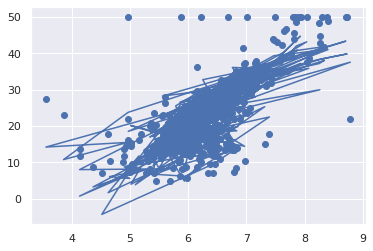

Model fitted using all features. 
 R^2: 0.7406145309242094 
 data: complete set


In [100]:
# Multi feature linear regression
r2_dict['multi'] = dict()

x_multi = np.array(df.loc[:, df.columns != "MEDV"])
mreg = LinearRegression(X=x_multi, y=y_train, multi=True)
mreg.fit()
plt.scatter(x_train['RM'], y_train)
plt.plot(np.array(x_train['RM']), mreg.predict(x_multi))
plt.show()
plt.close()
r2 = mreg.score()
r2_dict['multi']['all'] = 0 if r2 is None else r2
print('Model fitted using all features. \n R^2: {} \n data: {} set'.format(r2, 'train' if test else 'complete'))


(506, 2)


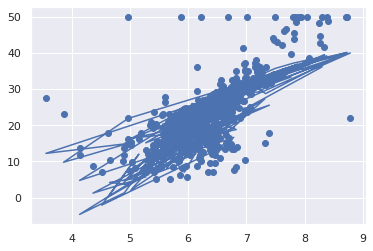

Model fitted using "RM"+"LSTAT" features. 
 R^2: 0.6385616062603404 
 data: complete set


In [101]:
# We train our model on the two best performing features

x_multi = np.array(df.loc[:, ["RM", "LSTAT"]])
print(x_multi.shape)
mreg = LinearRegression(X=x_multi, y=y_train, multi=True)
mreg.fit()
plt.scatter(x_train['RM'], y_train)
plt.plot(np.array(x_train['RM']), mreg.predict(x_multi))
plt.show()
plt.close()
r2 = mreg.score()
r2_dict['multi']['RM_LSTAT'] = 0 if r2 is None else r2
print('Model fitted using "RM"+"LSTAT" features. \n R^2: {} \n data: {} set'.format(r2, 'train' if test else 'complete'))

(506, 4)


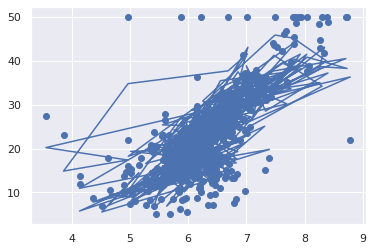

Model fitted using "RM", "LSTAT", "DIS", "INDUS" features in log space. 
 R^2: 0.7306906431433752 
 data: complete set


In [102]:
# Now we test them in log spape

x_multi = np.log(np.array(df.loc[:, ["RM", "LSTAT", "DIS", "INDUS"]]))
print(x_multi.shape)
mreg = LinearRegression(X=x_multi, y=y_train, multi=True)
mreg.fit()
plt.scatter(x_train['RM'], y_train)
plt.plot(np.array(x_train['RM']), mreg.predict(x_multi))
plt.show()
plt.close()
r2 = mreg.score()
r2_dict['multi']['RM_LSTAT'] = 0 if r2 is None else r2
print('Model fitted using "RM", "LSTAT", "DIS", "INDUS" features in log space. \n R^2: {} \n data: {} set'.format(r2, 'train' if test else 'complete'))

We have seen that the model performs better with more data.
In our final experimant we will combine both linear as well as the logarithmic data as input for our model.

(506, 24)


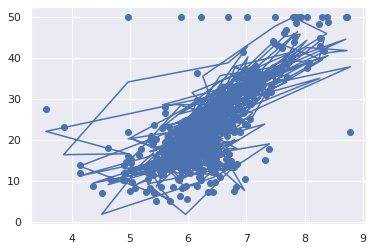

Model fitted using the complete dataset in both log and linear space 
 R^2: 0.8237580993132264 
 data: complete set


In [103]:

x_multi1 = np.log(np.array(df.loc[:, [key for key in input_keys if not np.isnan(r2_dict[key]['log'])]]))
x_multi2 = np.array(df.loc[:, df.columns != "MEDV"])
x_multi = np.hstack((x_multi1, x_multi2))
# [["RM", "LSTAT", "DIS", "INDUS"]]))
# x_multi = np.array(df.loc[:, ["RM", "LSTAT"]])
# x_multi[:,1] = np.log(x_multi[:,1])
print(x_multi.shape)
mreg = LinearRegression(X=x_multi, y=y_train, multi=True)
mreg.fit()
plt.scatter(x_train['RM'], y_train)
plt.plot(np.array(x_train['RM']), mreg.predict(x_multi))
plt.show()
plt.close()
r2 = mreg.score()
r2_dict['multi']['RM_LSTAT'] = 0 if r2 is None else r2
print('Model fitted using the complete dataset in both log and linear space \n R^2: {} \n data: {} set'.format(r2, 'train' if test else 'complete'))

#CONCLUSION

We have come to the end of this project with our best linear regression model scoring a $R^2$ score of $\mathbf{0.824}$, which is a good result for simple linear regression.
We compared different features and models, concluding that the model performs better on some features when transformed to log-space.
Using multiple features our model out performed the single feature version.
We confirmed the basic rule of machine learning: The more data, the better!
